In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test. shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


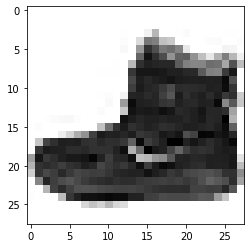

In [ ]:
i = 0
print(y_train_set [i])
plt.imshow(x_train_set[i], cmap='binary')
plt.show()

In [4]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set,
                                                      y_train_set,
                                                      random_state=1)


In [ ]:
print(x_train[0])
x_train2 = x_train / 255.0
print(x_train2[0])

In [5]:
# Preprocessing
x_train = x_train / 255.0
x_valid =x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


In [6]:
# Build Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [7]:
keras.backend.clear_session()
np. random. seed (1)
tf.random.set_seed(1)

In [8]:
model = Sequential([
    #第一層：將 28*28攤平成一維度
    Flatten(input_shape=x_train.shape[1:]),
    #第二層
    Dense (units=300, activation='relu'),
    Dense (units=200, activation='relu'),
    Dense (units=100, activation='relu'),
    #輸出層：10類別，10個神經元
    Dense (units=10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile01
model.compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics= ['accuracy'])

In [10]:
# Compile02
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',
               optimizer=opt,
               metrics= ['accuracy'])

In [ ]:
# Compile03
model.compile(loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
               metrics= ['accuracy'])

In [11]:
# Train
train = model.fit(x_train, y_train,
                   epochs=10,
                  validation_data=(x_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 16s 10ms/step - loss: 0.6114 - accuracy: 0.7843 - val_loss: 0.4728 - val_accuracy: 0.8403
Epoch 2/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4749 - accuracy: 0.8313 - val_loss: 0.4314 - val_accuracy: 0.8499
Epoch 3/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4545 - accuracy: 0.8428 - val_loss: 0.4517 - val_accuracy: 0.8437
Epoch 4/10
1407/1407 [==============================] - 15s 10ms/step - loss: 0.4342 - accuracy: 0.8461 - val_loss: 0.5782 - val_accuracy: 0.7965
Epoch 5/10
1407/1407 [==============================] - 15s 10ms/step - loss: 0.4231 - accuracy: 0.8495 - val_loss: 0.4625 - val_accuracy: 0.8562
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4295 - accuracy: 0.8502 - val_loss: 0.4446 - val_accuracy: 0.8435
Epoch 7/10
1407/1407 [==============================] - 15s 10ms/step - loss: 0.4074 - accuracy: 0.8574 - val_loss: 0.4481 - 

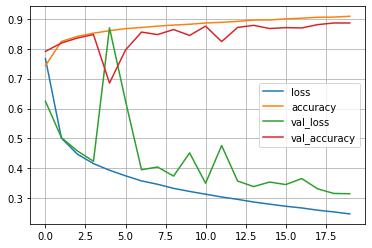

In [ ]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt. show()

In [12]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5217 - accuracy: 0.8347


[0.5217254161834717, 0.8346999883651733]

In [ ]:
# Predict
y_proba = model.predict(x_test)
y_proba[:3].round (2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[:3]# 預測結果

array([9, 2, 1])

In [ ]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[776   1  20  52   4   2 132   0  13   0]
 [  0 967   0  24   2   0   6   0   1   0]
 [  8   1 822  21  62   1  81   1   3   0]
 [ 15   7  11 931  10   0  19   0   7   0]
 [  0   1 142  52 733   0  66   0   6   0]
 [  0   0   0   1   0 956   0  30   1  12]
 [ 88   2  85  42  56   0 707   0  20   0]
 [  0   0   0   0   0  18   0 970   0  12]
 [  2   0   5   9   2   4   5   3 970   0]
 [  0   0   0   0   0  12   1  66   0 921]]
